[ 5.11561240e-04 -5.54954989e+01]


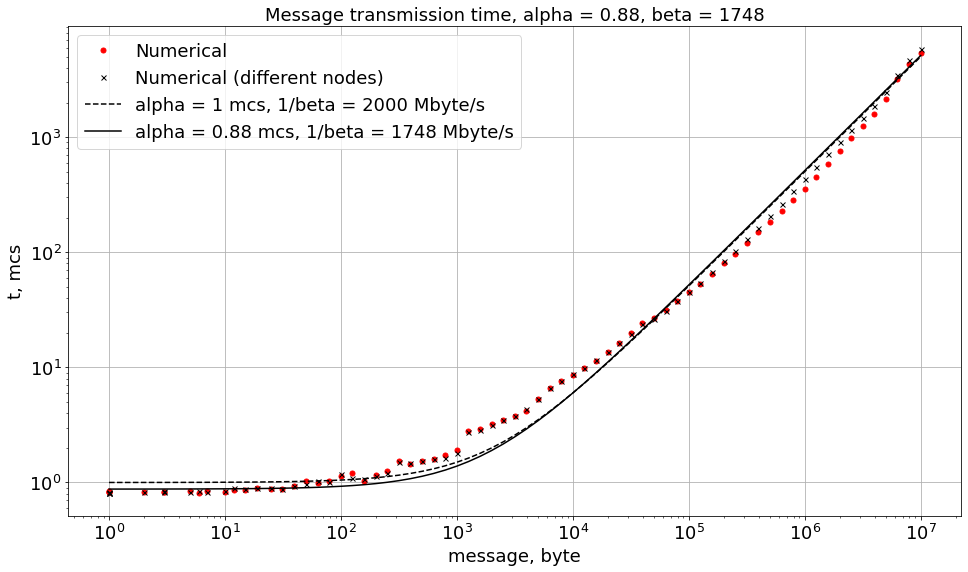

[-1.32815280e-04  2.80912484e+03]


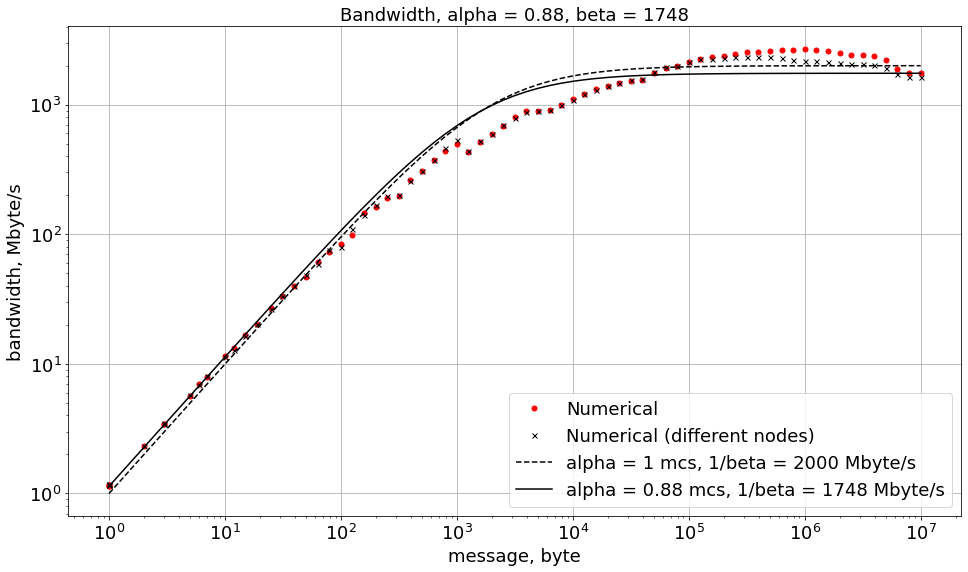

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os

def loadData() : 
    file = open('latency.txt', 'r')
    
    message_size = np.array([])
    t = np.array([])
    band = np.array([])
    for line in file : 
        message_size = np.append(message_size, float(line.split()[0]))
        t = np.append(t, float(line.split()[1]))
        band = np.append(band, float(line.split()[2]))
        
    return message_size, t, band

def loadDataDiffNodes() : 
    file = open('latency_diff_nodes.txt', 'r')
    
    message_size = np.array([])
    t = np.array([])
    band = np.array([])
    for line in file : 
        message_size = np.append(message_size, float(line.split()[0]))
        t = np.append(t, float(line.split()[1]))
        band = np.append(band, float(line.split()[2]))
        
    return message_size, t, band

def tAnalytical(m, alpha, beta) : 
    return alpha + beta*m

def bandAnalytical(m, alpha, beta) : 
    return m/(alpha+beta*m)

def drawt(m, t, m1, t1) : 
    ta = np.zeros(len(m))
    for i in range(len(ta)) : 
        ta[i] = tAnalytical(m[i], 1, 1/2000)
    
    ta1 = np.zeros(len(m))
    for i in range(len(ta1)) : 
        ta1[i] = tAnalytical(m[i], 0.876, 1/1954)
    
    fig = plt.figure(figsize = (16, 9))
    ax = fig.add_subplot(111)
    
    ax.plot(m, t, linestyle = 'None', color = 'red', marker = 'o', markersize = 5, label = 'Numerical')
    ax.plot(m1, t1,linestyle = 'None', color = 'black', marker = 'x', markersize = 5, label = 'Numerical (different nodes)')
    ax.plot(m, ta, linestyle = '--', color = 'black', label = 'alpha = 1 mcs, 1/beta = 2000 Mbyte/s')
    ax.plot(m, ta1, linestyle = '-', color = 'black', label = 'alpha = 0.88 mcs, 1/beta = 1748 Mbyte/s')
    p = np.polyfit(m[30:], t[30:], 1)
    print(p)

    xax = ax.xaxis
    xlocs = xax.get_ticklocs()
    xlabels = xax.get_ticklabels()
    xlines = xax.get_ticklines()

    xax.grid(True)

    for label in xlabels :
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(18)
    
    yax = ax.yaxis
    ylocs = yax.get_ticklocs()
    ylabels = yax.get_ticklabels()
    ylines = yax.get_ticklines()
    yax.grid(True)

    for label in ylabels :
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(18)
    
    plt.xlabel('message, byte', fontsize = 18)
    plt.ylabel('t, mcs', fontsize = 18)

    plt.legend(loc = 'best', fontsize = 18)
    plt.title('Message transmission time, alpha = 0.88, beta = 1748', fontsize = 18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    os.chdir(os.getcwd() + "\outData")
    plt.savefig('t.png')
    os.chdir(os.getcwd().replace("\outData", ""))
    

        
    plt.show()
    
def drawBand(m, band, m1, band1) :
    #m = m[:60]
    #m1 = m1[:60]
    #band = band[:60]
    #band1 = band1[:60]
    banda = np.zeros(len(m))
    for i in range(len(banda)) : 
        banda[i] = bandAnalytical(m[i], 1, 1/2000)
        
    banda1 = np.zeros(len(m))
    for i in range(len(banda1)) : 
        banda1[i] = bandAnalytical(m[i], 0.88, 1/1748)
    
    fig = plt.figure(figsize = (16, 9))
    ax = fig.add_subplot(111)

    ax.plot(m, band, linestyle = 'None', color = 'red', marker = 'o', markersize = 5, label = 'Numerical')
    ax.plot(m1, band1, linestyle = 'None', color = 'black', marker = 'x', markersize = 5, label = 'Numerical (different nodes)')
    ax.plot(m, banda, linestyle = '--', color = 'black', label = 'alpha = 1 mcs, 1/beta = 2000 Mbyte/s')
    ax.plot(m, banda1, linestyle = '-', color = 'black', label = 'alpha = 0.88 mcs, 1/beta = 1748 Mbyte/s')
    p = np.polyfit(m[-10:-1], band[-10:-1], 1)
    print(p)
    
    xax = ax.xaxis
    xlocs = xax.get_ticklocs()
    xlabels = xax.get_ticklabels()
    xlines = xax.get_ticklines()

    xax.grid(True)

    for label in xlabels :
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(18)
    
    yax = ax.yaxis
    ylocs = yax.get_ticklocs()
    ylabels = yax.get_ticklabels()
    ylines = yax.get_ticklines()
    yax.grid(True)

    for label in ylabels :
        label.set_color('black')
        label.set_rotation(0)
        label.set_fontsize(18)
    
    plt.xlabel('message, byte', fontsize = 18)
    plt.ylabel('bandwidth, Mbyte/s', fontsize = 18)

    plt.legend(loc = 'best', fontsize = 18)
    plt.title('Bandwidth, alpha = 0.88, beta = 1748', fontsize = 18)
    ax.set_xscale('log')
    ax.set_yscale('log')
    os.chdir(os.getcwd() + "\outData")
    plt.savefig('b.png')
    os.chdir(os.getcwd().replace("\outData", ""))
    plt.show()
    

message_size, t, band = loadData()
message_size1, t1, band1 = loadDataDiffNodes()


drawt(message_size, t, message_size1, t1)
drawBand(message_size, band, message_size1, band1)